In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.insert(1, '../vista-simulator')
sys.path.insert(1, '../vista-simulator/libs')

from os.path import join as jn

import pandas as pd

import imp
import utilities
imp.reload(utilities)
from utilities import ResultsHandler, plot_results_line

# import results_generator
# imp.reload(results_generator)
# from results_generator import ResultsGenerator

# Import Data

In [128]:
import utilities
imp.reload(utilities)
from utilities import ResultsHandler

RH = ResultsHandler()
RH.get_results_of_model(model='EM', version='1.5', scenario='Current')
RH.get_results_of_model(model='EM', version='1.5', scenario='L35_baseline')
RH.get_results_of_model(model='EM', version='1.5', scenario='Unitary_BEO1_H_L35')
RH.get_results_of_model(model='EM', version='1.5', scenario='Unitary_BEO1_L_L35')
# RH.get_results_of_model(model='EM', version='1.5', scenario='L50_baseline')
#RH.get_all_results_model(model='EM', version='1.5')
RH.compute_all_KPIs()
df = RH.df_results
print (RH.tags.keys())

dict_keys(['EM_L35_baseline_1.5', 'EM_Unitary_BEO1_L_L35_1.5', 'EM_Current_1.5', 'EM_Unitary_BEO1_H_L35_1.5'])


# Fuel price impact in 2035

## L35

NameError: name 'explode' is not defined

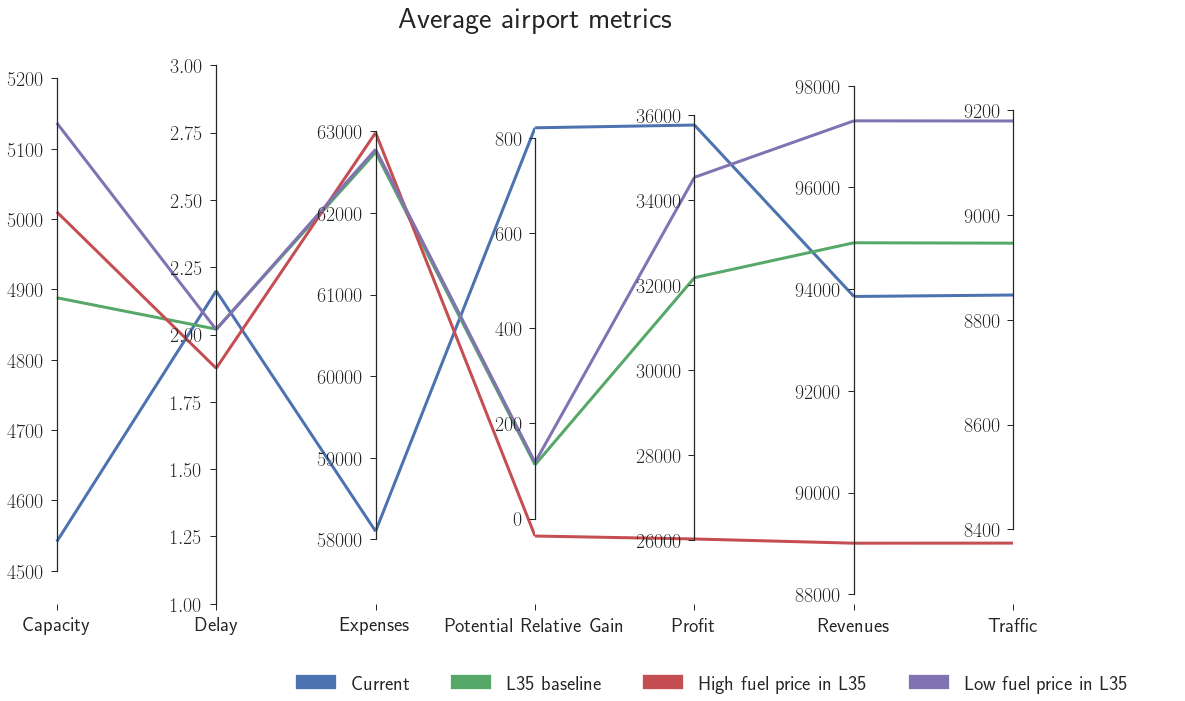

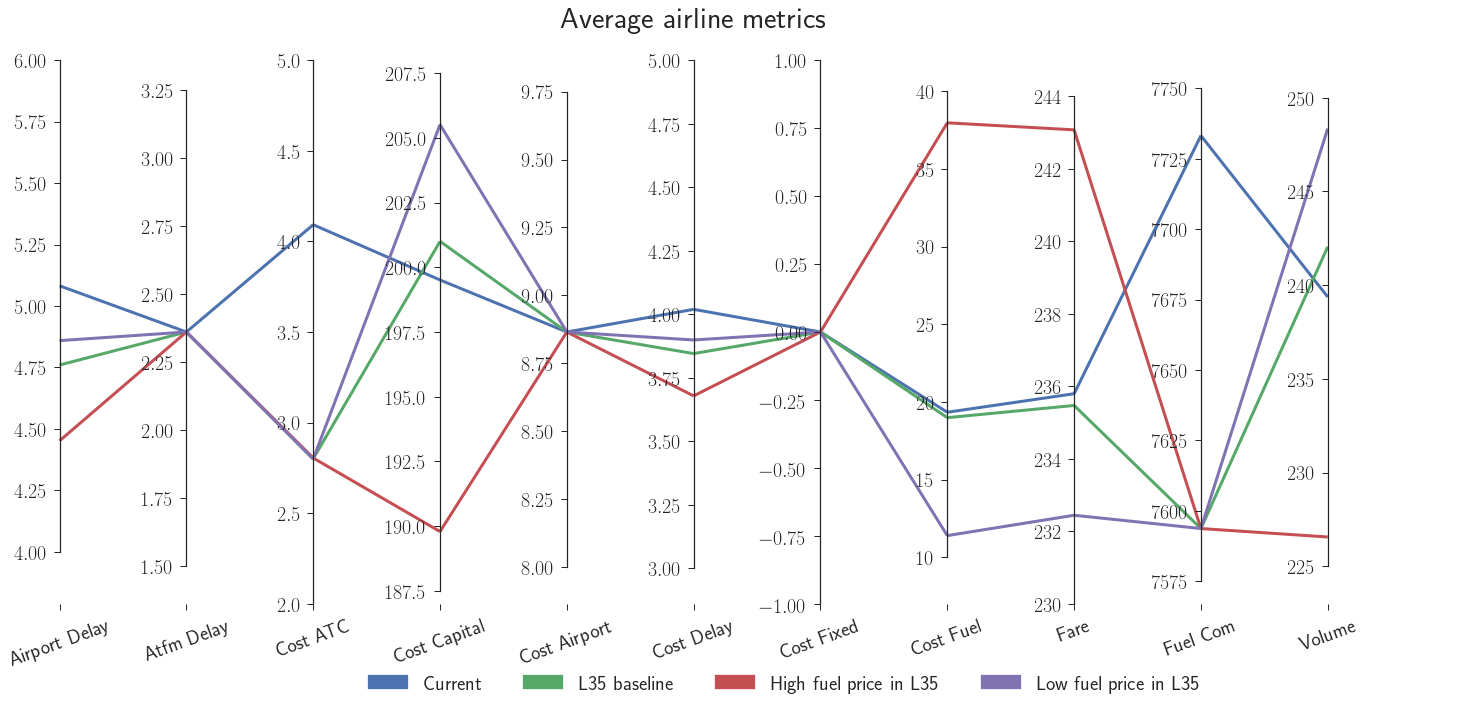

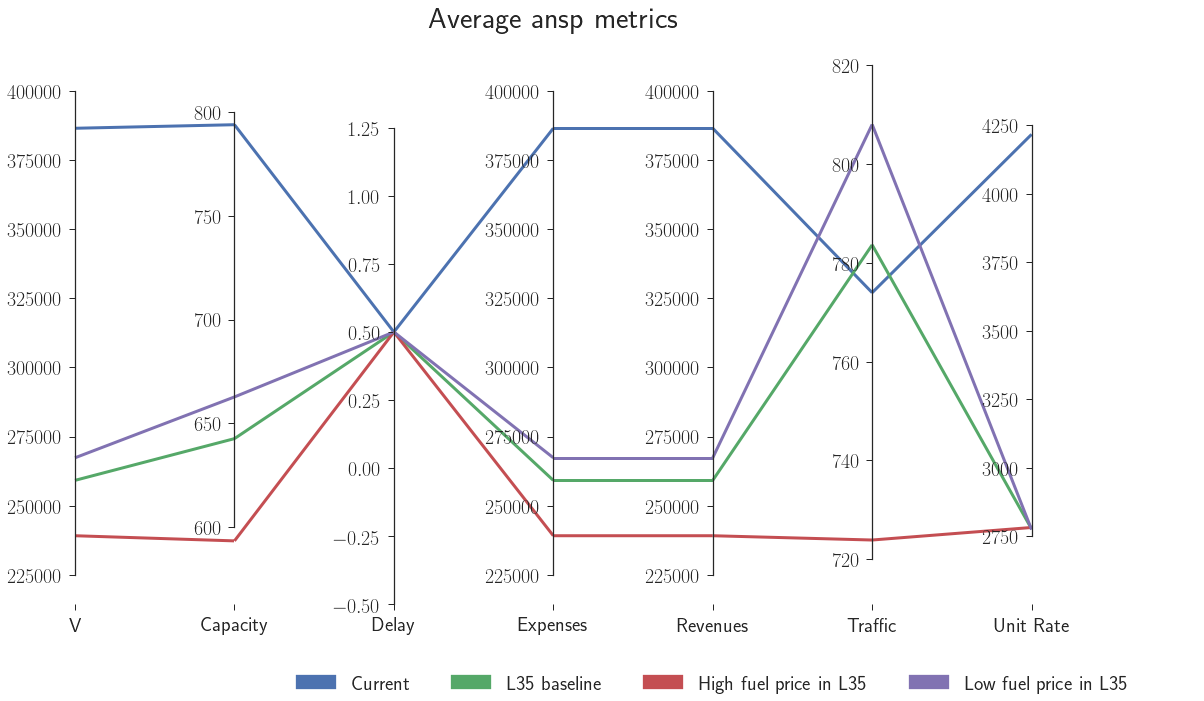

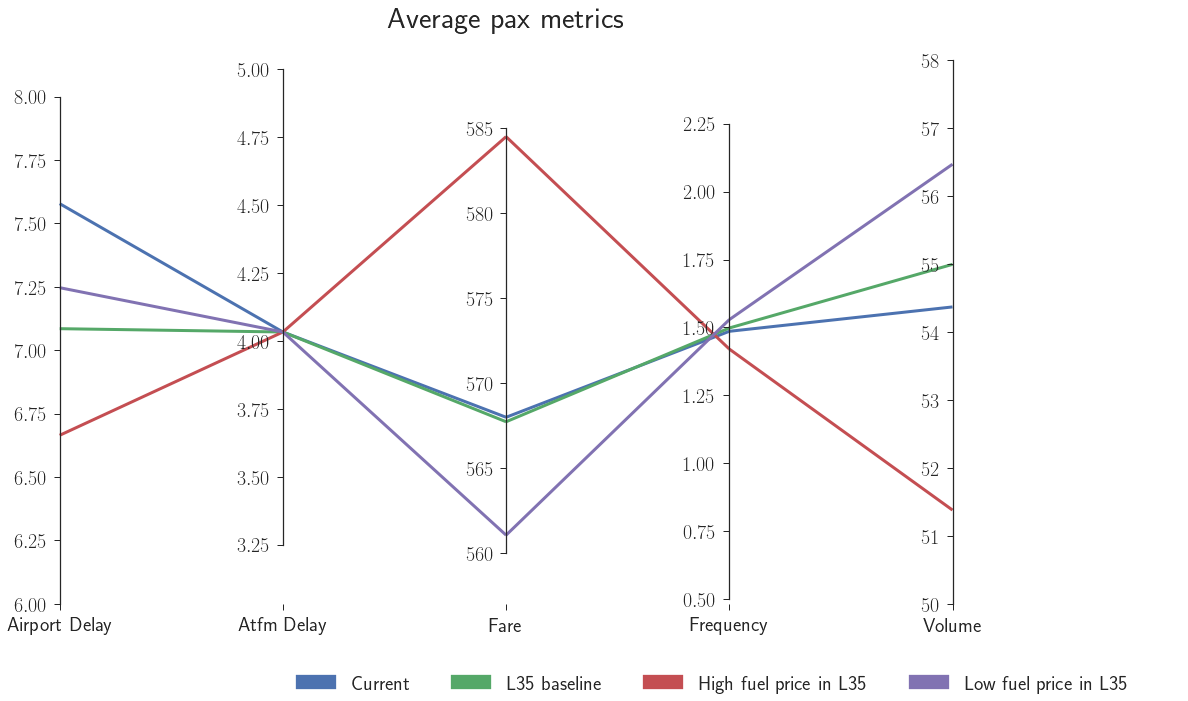

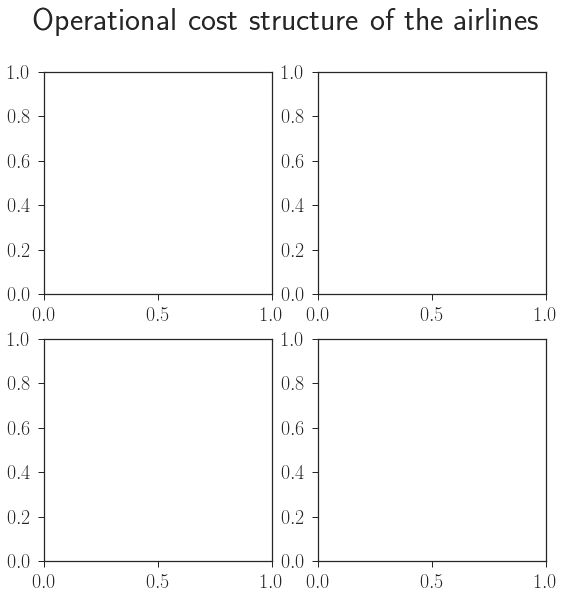

In [129]:
tags = ['EM_Current_1.5', 'EM_L35_baseline_1.5', 'EM_Unitary_BEO1_H_L35_1.5', 'EM_Unitary_BEO1_L_L35_1.5']
RH.do_all_EM_plots(tags, prefix_plots='fuel_price_L35')

# Fuel impact in 2050

## L50

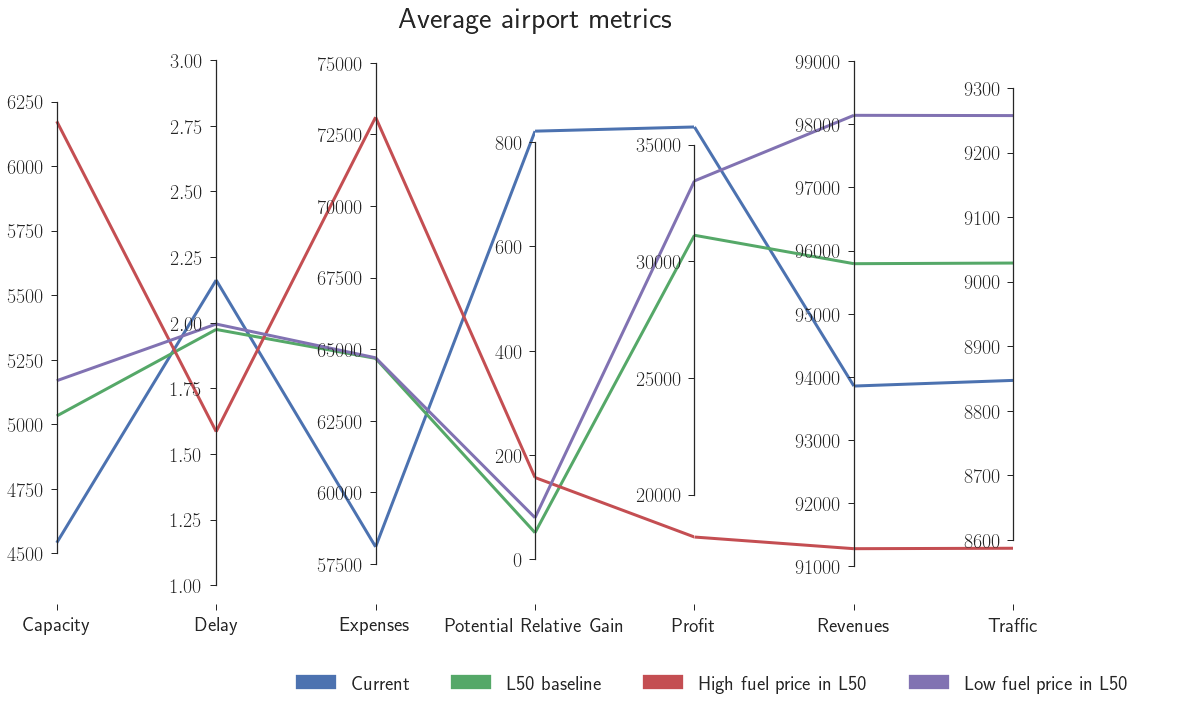

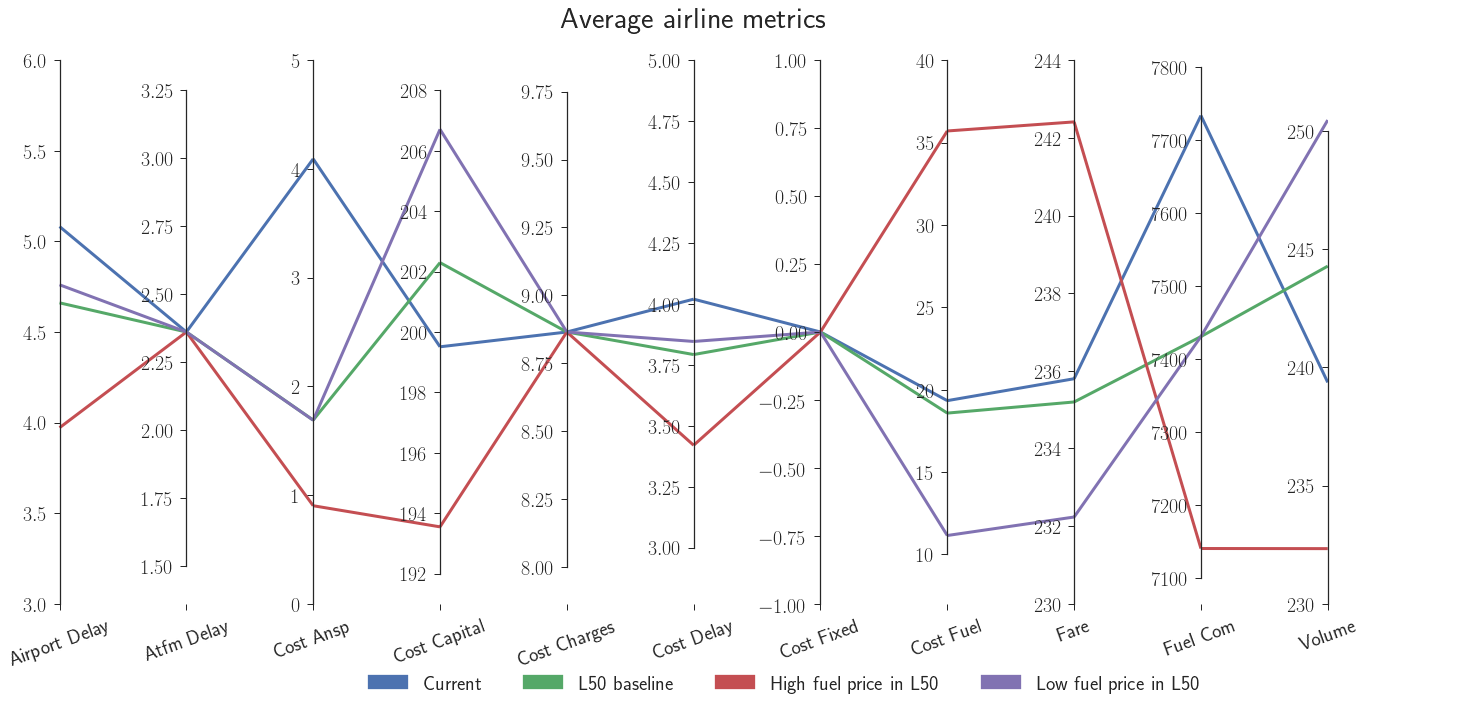

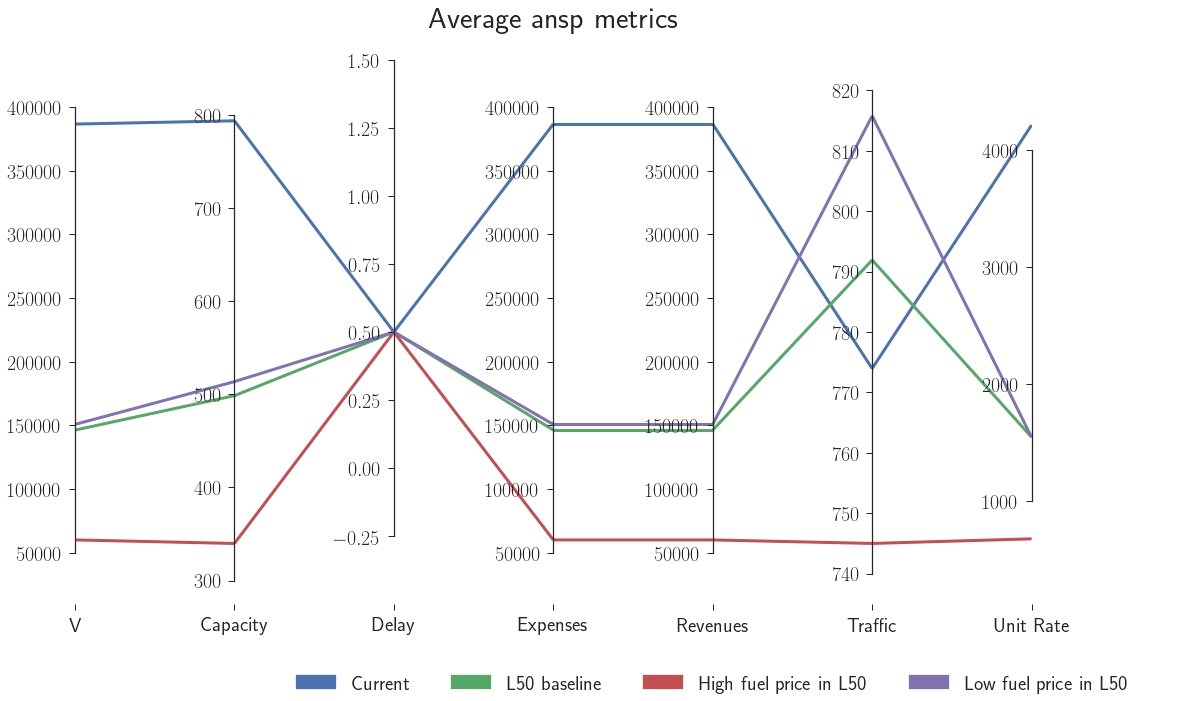

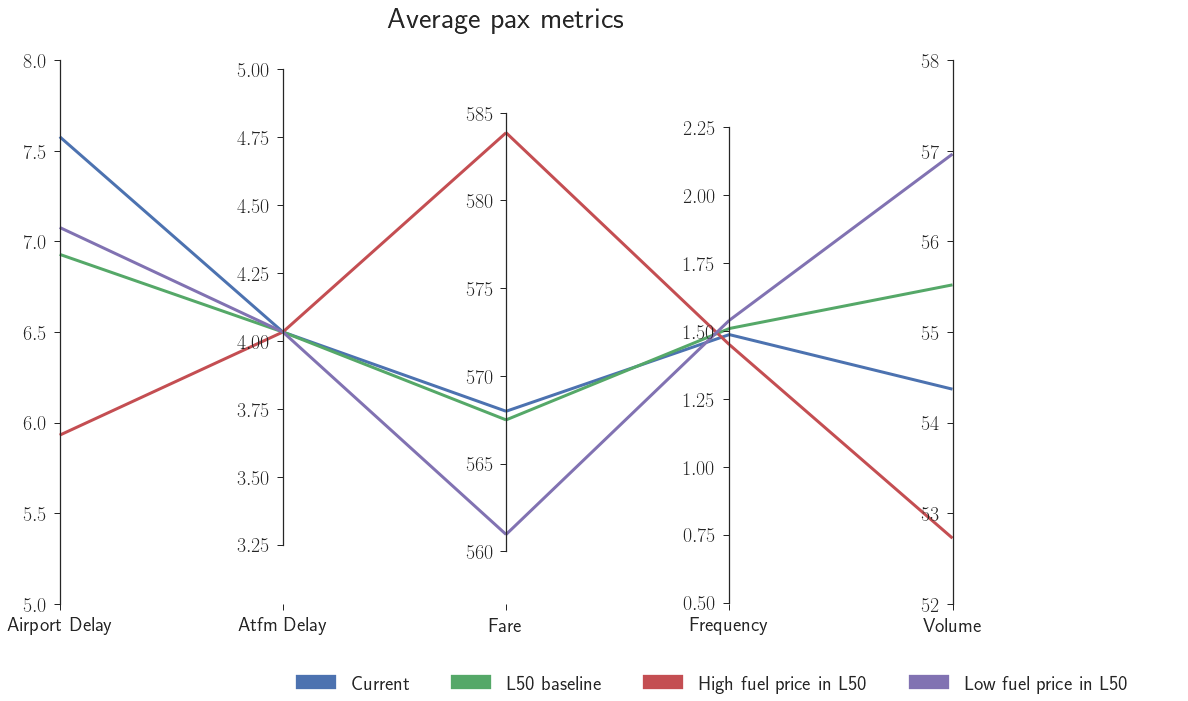

In [57]:
tags = ['EM_Current_1.5', 'EM_L50_baseline_1.5', 'EM_Unitary_BEO1_H_L50_1.5', 'EM_Unitary_BEO1_L_L50_1.5']
RH.do_all_EM_plots(tags, prefix_plots='fuel_price_L50')

# Test zone

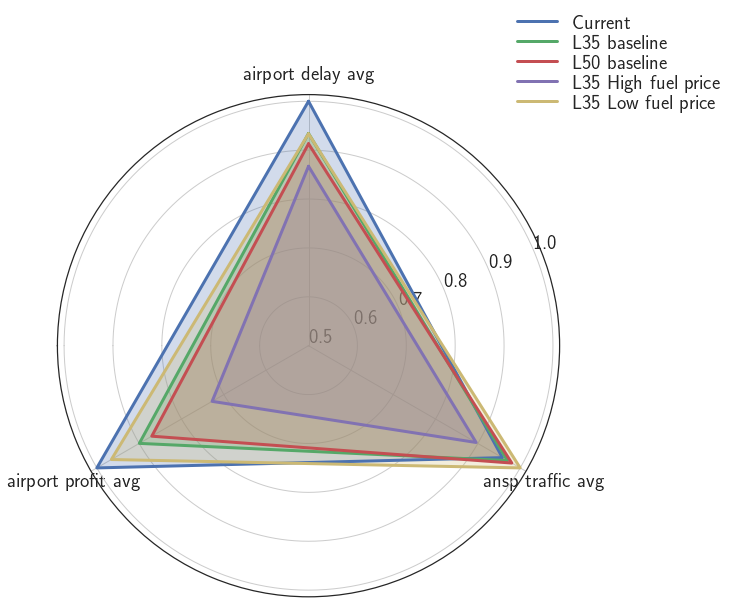

In [9]:
plot_results_radial(df.T[['airport_delay_avg', 'airport_profit_avg', 'ansp_traffic_avg']].rename(columns=rename_col, index=rename_idx),
                  case_column="index")

(2, 2)


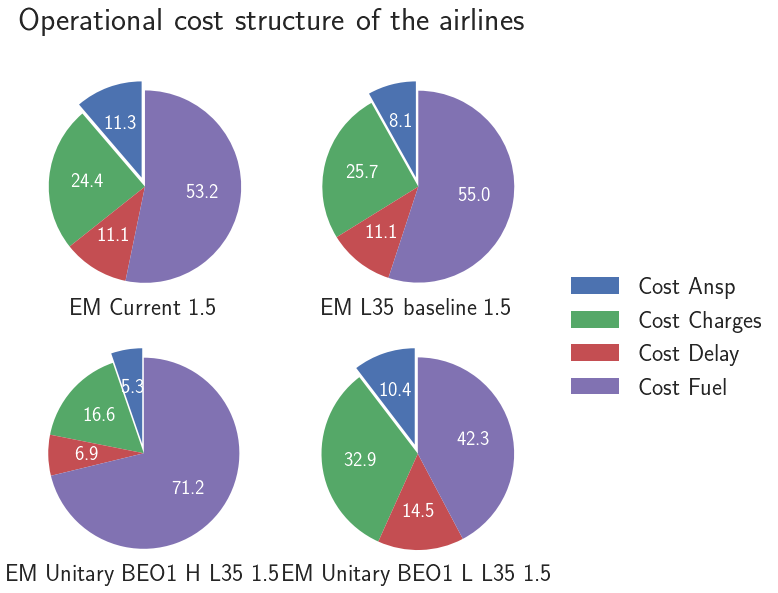

In [115]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
cols = ['airline_cost_ANSP_avg', 'airline_cost_charges_avg', 'airline_cost_delay_avg', 'airline_cost_fuel_avg']
cols_r = [rename_col_short[c] for c in cols]
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
explode = (0.1, 0., 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig = figure(figsize=(9, 9))
tags = ['EM_Current_1.5', 'EM_L35_baseline_1.5', 'EM_Unitary_BEO1_H_L35_1.5', 'EM_Unitary_BEO1_L_L35_1.5']
#fig, axarr = plt.subplots(1, len(tags), figsize=(9*len(tags), 9))
nline = 2
fig, axarr = plt.subplots(2, 2, figsize=(9, 9))
suptitle('Operational cost structure of the airlines', size=32)
print (axarr.shape)
fs = 24
for i, tag in enumerate(tags):
    ax = axarr[int(i/nline)][i%nline]
    patches, texts, autotexts = ax.pie(list(df.T[cols].T[tag].rename(index=rename_col_short)), explode=explode,
                                        #labels=cols_r, 
                                        autopct='%1.1f%%',
                                        shadow=False,
                                        startangle=90)
    [c.set_fontsize(20) for c in autotexts]
    [c.set_color('w') for c in autotexts]
    [c.set_fontsize(fs) for c in texts]
    
    if i==len(tags)-1:
        legend(patches, cols_r, loc='right', fontsize=fs, bbox_to_anchor=(2.1, 1))
    ax.set_xlabel(tag.replace('_', ' '), size=fs)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

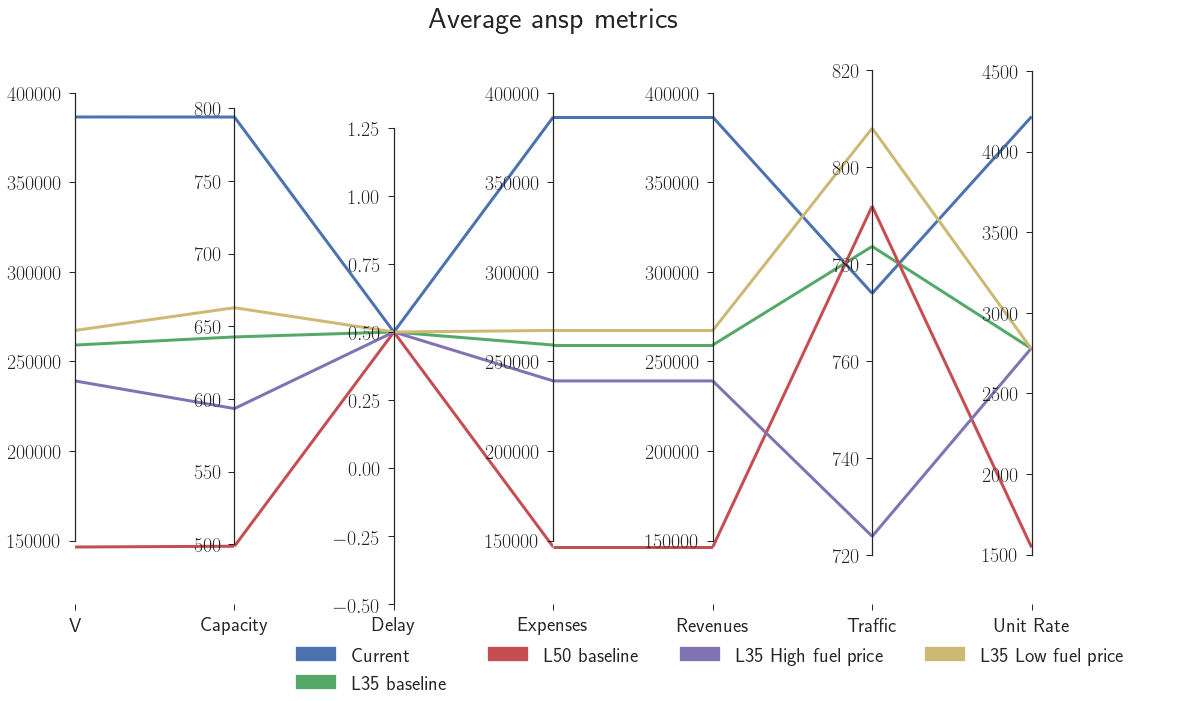

In [22]:
agent_type = 'ansp'
coin = df.T[[col for col in df.T.columns if col[-3:]=='avg' and col.split('_')[0]==agent_type]].rename(columns=rename_col_short, index=rename_idx)
plot_results_line(coin, case_column="index", figsize=(20, 10), linewidth=3, xlabel_rotation=0,
                  title='Average ' + agent_type + ' metrics')

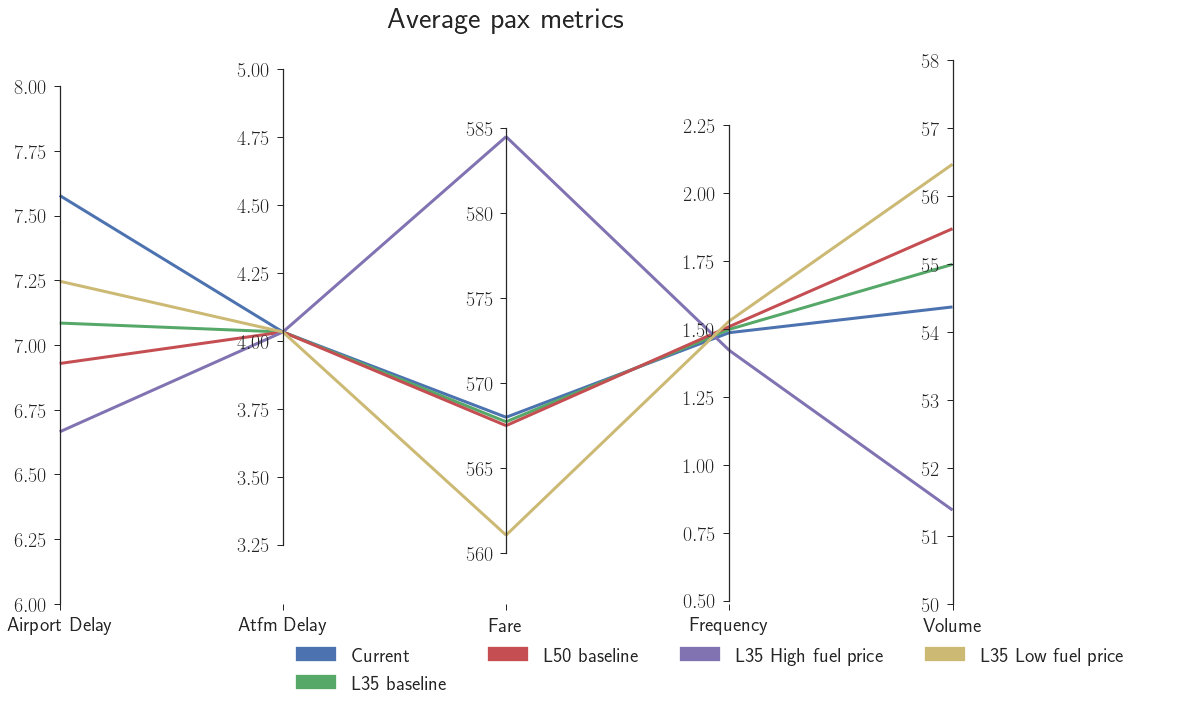

In [23]:
agent_type = 'pax'
coin = df.T[[col for col in df.T.columns if col[-3:]=='avg' and col.split('_')[0]==agent_type]].rename(columns=rename_col_short, index=rename_idx)
plot_results_line(coin, case_column="index", figsize=(20, 10), linewidth=3, xlabel_rotation=0,
                  title='Average ' + agent_type + ' metrics')